In [38]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [6]:
data = pd.read_csv('responses.csv')

In [7]:
data.head()

,birth,gender,sexuality,ethnicity,childhood,religion,politics,parent_edu,parent_north_amer,household_inc,parent_stem,family_funded,hs_avg,hs_extrac,hs_accel,discovery,fac_apps,industry_goal,job_search_1a,job_search_1b,job_search_2a,job_search_2b,job_search_3a,job_search_3b,industry_1a,industry_1b,industry_2a,industry_2b,industry_3a,industry_3b,city_1a,city_1b,city_2a,city_2b,city_3a,city_3b,salary_1a,currency_1a,salary_1b,currency_1b,salary_2a,currency_2a,salary_2b,currency_2b,salary_3a,currency_3a,salary_3b,currency_3b,negotiate,negotiate_add,uni_fund,company_1a,company_1b,company_2a,company_2b,company_3a,company_3b,avg_1a,avg_1b,avg_2a,avg_2b,avg_3a,avg_3b,avg_4a,avg_4b_estim,avg_4a_cumul,avg_4b_cumul_estim,rent_1a,rent_1b,rent_2a,rent_2b,rent_3a,rent_3b,rent_4a,rent_4b,stress_1a,stress_1b,stress_2a,stress_2b,stress_3a,stress_3b,stress_4a,stress_4b,attendance_1a,attendance_1b,attendance_2a,attendance_2b,attendance_3a,attendance_3b,attendance_4a,attendance_4b,years_to_finish,exchange,most_interesting,most_interesting_grade,most_useful,most_useful_grade,worst,worst_grade
0,1997,Female,Heterosexual,East Asian,KW,None,3,Technical Degree,Yes,$100 - 150k,No,25 - 50%,87.0,"Organized sports, Local volunteering, Music, Non-engineering related job",None,University open house,None,Healthcare,Waterloo Works,Waterloo Works,Waterloo Works,Waterloo Works,Networking/ Referral,Waterloo Works,Software,Software,Software,UI/UX Design,Project Management,UI/UX Design,GTA,KW,GTA,KW,GTA,GTA,20.00,cad,17.00,cad,21.0,cad,22.0,cad,20.0,cad,24.0,cad,Yes,4.0,"Family, Co-op, Student loans, High school savings, Part-time job",Software,Manufacturing,Software,Finance,Healthcare/ Biotech,Software,62.00,71.00,66.0,66.00,72.0,66.00,73.0,79.0,70.00,70.00,$500 - 600/month,$500 - 600/month,$500 - 600/month,< $500/ month,< $500/ month,$700 - 800/month,Lived at home,Lived at home,9.0,4.0,9.0,9.0,9.0,6.0,4.0,2.0,Almost always,Almost always,Almost always,Almost always,Most of the time,Most of the time,About half the time,Occasionally,5.0,None,CLAS 104,NaN,SYDE 348,NaN,SYDE 292,NaN
1,1997,Female,Heterosexual,Southeast Asian,KW,Agnostic,1,Masters,No,$50 - 100k,"Yes, engineering",0 - 25%,89.0,"Student club member, Theatre, Engineering related job",None,Family,Arts,No idea,Networking/ Referral,Networking/ Referral,Networking/ Referral,Networking/ Referral,Waterloo Works,Networking/ Referral,UI/UX Design,UI/UX Design,UI/UX Design,UI/UX Design,UI/UX Design,UI/UX Design,KW,Other Canada,Other Canada,KW,Cali,KW,19.00,cad,35.00,cad,35.0,cad,18.0,cad,NaN,NaN,25.0,cad,Yes,10.0,"Co-op, RESP",Software,Healthcare/ Biotech,Healthcare/ Biotech,Consulting,Healthcare/ Biotech,Hardware,69.00,67.00,67.0,62.00,69.0,73.00,75.0,79.0,69.00,70.00,Lived at home,Lived at home,Lived at home,Lived at home,Lived at home,Lived at home,Lived at home,Lived at home,7.0,2.0,9.0,10.0,10.0,8.0,7.0,5.0,Almost always,About half the time,Most of the time,Most of the time,Most of the time,Most of the time,Most of the time,Most of the time,5.0,None,SYDE 348,87.0,SYDE 348,87.0,SYDE 292,50.0
2,1997,Female,Homosexual,East Asian,GTA,Catholic,3,Bachelors,No,$150 - 200k,"Yes, but not engineering",75 - 100%,89.0,"Organized sports, Local volunteering, Non-engineering related job",None,Website/research,Computer Science,Finance,Waterloo Works,Previous Employer,Waterloo Works,Waterloo Works,Waterloo Works,Previous Employer,Other,Other,Software,Software,Software,Software,GTA,GTA,GTA,GTA,Cali,Cali,17.50,cad,17.50,cad,22.5,cad,22.5,cad,35.0,usd,35.0,usd,No,NaN,Family,Finance,Finance,Software,Software,Software,Software,72.46,74.42,72.8,77.38,77.0,76.27,75.4,80.0,75.16,77.58,$600 - 700/month,$600 - 700/month,< $500/ month,$600 - 700/month,$600 - 700/month,$600 - 700/month,$600 - 700/month,$600 - 700/month,10.0,6.0,5.0,7.0,5.0,10.0,4.0,4.0,Almost always,Almost always,Almost always,Almost always,Almost always,Almost always,Almost always,Almost always,5.0,None,MSCI 436,90.0,MSCI 436,90.0,SYDE 383,55.0
3,1995,Female,Heterosexual

In [8]:
list(set(data['hs_accel'].tolist()))

['None',
 'Extended French',
 'French immersion',
 'Gifted/enhanced',
 'IB, Private school',
 'AP, Private school',
 'IB, Extended French',
 'Private school',
 'ICT SHSM',
 'AP',
 'IB',
 'International Business and Technology',
 'Extended French Program',
 'art specialist',
 'AP, Gifted/enhanced']

In [13]:
from collections import Counter

In [14]:
Counter(data['hs_accel'].tolist())

Counter({'None': 29,
         'Extended French': 2,
         'AP': 5,
         'AP, Gifted/enhanced': 2,
         'French immersion': 5,
         'Extended French Program': 1,
         'Gifted/enhanced': 5,
         'IB': 5,
         'Private school': 3,
         'art specialist': 1,
         'AP, Private school': 2,
         'IB, Private school': 1,
         'IB, Extended French': 1,
         'International Business and Technology': 1,
         'ICT SHSM': 1})

In [22]:
none = data.loc[data['hs_accel'] == "None"]

french = data.loc[((data['hs_accel'] == "Extended French") | 
                       (data['hs_accel'] == "Extended French Program") | 
                       (data['hs_accel'] == "IB, Extended French") |
                       (data['hs_accel'] == "French immersion"))]

others = data.loc[((data['hs_accel'] == "International Business and Technology") |
                   (data['hs_accel'] == "art specialist")|
                   (data['hs_accel'] == "ICT SHSM"))]

ib = data.loc[((data['hs_accel'] == "IB") | 
               (data['hs_accel'] == "IB, Extended French") | 
               (data['hs_accel'] == "IB, Private school"))]

gifted = data.loc[((data['hs_accel'] == "Gifted/enhanced") | 
               (data['hs_accel'] == "AP, Gifted/enhanced"))]

ap = data.loc[((data['hs_accel'] == "AP, Private school") | 
               (data['hs_accel'] == "AP") | 
               (data['hs_accel'] == "AP, Gifted/enhanced"))]

private = data.loc[((data['hs_accel'] == "AP, Private school") | 
               (data['hs_accel'] == "Private school") | 
               (data['hs_accel'] == "IB, Private school"))]

In [24]:
print(len(none))
print(len(french))
print(len(others))
print(len(ib))
print(len(gifted))
print(len(ap))
print(len(private))

29
9
3
7
7
9
6


In [25]:
french_grades = french['avg_1a'].append(
                    french['avg_1b'],ignore_index=True).append(
                    french['avg_2a'],ignore_index=True).append(
                    french['avg_3b'],ignore_index=True).append(
                    french['avg_3a'],ignore_index=True).append(
                    french['avg_3b'],ignore_index=True).append(
                    french['avg_4a'],ignore_index=True)
french_labels = pd.Series(["French Program" for i in range(len(french_grades))])

none_grades = none['avg_1a'].append(
                    none['avg_1b'],ignore_index=True).append(
                    none['avg_2a'],ignore_index=True).append(
                    none['avg_3b'],ignore_index=True).append(
                    none['avg_3a'],ignore_index=True).append(
                    none['avg_3b'],ignore_index=True).append(
                    none['avg_4a'],ignore_index=True)
none_labels = pd.Series(["None" for i in range(len(none_grades))])

others_grades = others['avg_1a'].append(
                    others['avg_1b'],ignore_index=True).append(
                    others['avg_2a'],ignore_index=True).append(
                    others['avg_3b'],ignore_index=True).append(
                    others['avg_3a'],ignore_index=True).append(
                    others['avg_3b'],ignore_index=True).append(
                    others['avg_4a'],ignore_index=True)
others_labels = pd.Series(["Other Programs" for i in range(len(others_grades))])

ib_grades = ib['avg_1a'].append(
                    ib['avg_1b'],ignore_index=True).append(
                    ib['avg_2a'],ignore_index=True).append(
                    ib['avg_3b'],ignore_index=True).append(
                    ib['avg_3a'],ignore_index=True).append(
                    ib['avg_3b'],ignore_index=True).append(
                    ib['avg_4a'],ignore_index=True)
ib_labels = pd.Series(["International Baccalaureate" for i in range(len(ib_grades))])

gifted_grades = gifted['avg_1a'].append(
                    gifted['avg_1b'],ignore_index=True).append(
                    gifted['avg_2a'],ignore_index=True).append(
                    gifted['avg_3b'],ignore_index=True).append(
                    gifted['avg_3a'],ignore_index=True).append(
                    gifted['avg_3b'],ignore_index=True).append(
                    gifted['avg_4a'],ignore_index=True)
gifted_labels = pd.Series(["Gifted/enhanced" for i in range(len(gifted_grades))])

ap_grades = ap['avg_1a'].append(
                    ap['avg_1b'],ignore_index=True).append(
                    ap['avg_2a'],ignore_index=True).append(
                    ap['avg_3b'],ignore_index=True).append(
                    ap['avg_3a'],ignore_index=True).append(
                    ap['avg_3b'],ignore_index=True).append(
                    ap['avg_4a'],ignore_index=True)
ap_labels = pd.Series(["Advanced Placement" for i in range(len(ap_grades))])

private_grades = private['avg_1a'].append(
                    private['avg_1b'],ignore_index=True).append(
                    private['avg_2a'],ignore_index=True).append(
                    private['avg_3b'],ignore_index=True).append(
                    private['avg_3a'],ignore_index=True).append(
                    private['avg_3b'],ignore_index=True).append(
                    private['avg_4a'],ignore_index=True)
private_labels = pd.Series(["Private School" for i in range(len(private_grades))])

In [28]:
grades = french_grades.append(
            none_grades,ignore_index=True).append(
            others_grades,ignore_index=True).append(
            ib_grades,ignore_index=True).append(
            gifted_grades,ignore_index=True).append(
            ap_grades,ignore_index=True).append(
            private_grades,ignore_index=True)
labels = french_labels.append(
            none_labels,ignore_index=True).append(
            others_labels,ignore_index=True).append(
            ib_labels,ignore_index=True).append(
            gifted_labels,ignore_index=True).append(
            ap_labels,ignore_index=True).append(
            private_labels,ignore_index=True)

In [29]:
grades

0      72.730
1      77.000
2      84.000
3      66.400
4      82.300
5      79.000
6      75.000
7      68.820
8      67.090
9      73.830
10     71.000
11     87.000
12     74.300
13     85.800
14     71.000
15     72.000
16     76.580
17     76.250
18     67.800
19     65.000
20     79.000
21     72.600
22     83.800
23     73.000
24     65.000
25     74.200
26     68.000
27     79.540
28     79.000
29     73.000
30     78.000
31        NaN
32     64.000
33     74.000
34     76.540
35     78.270
36     75.000
37     72.000
38     80.000
39     72.600
40     82.000
41     72.000
42     67.000
43     78.000
44     82.800
45     79.540
46     79.000
47     73.000
48     78.000
49        NaN
50     64.000
51     74.000
52     76.540
53     78.270
54     84.200
55     87.000
56     82.000
57     81.400
58     82.800
59     85.000
60     85.000
61     83.000
62     83.200
63     62.000
64     69.000
65     72.460
66     73.460
67     73.360
68     83.300
69     78.000
70     84.091
71    

In [73]:
uni_grades = pd.DataFrame({
    "Grades": grades,
    "High School Acceleration": labels
})
labels_sorted = list(set(uni_grades['High School Acceleration']))
labels_sorted.remove('None')
labels_sorted = sorted(labels_sorted)
labels_sorted.insert(0, 'None')


In [74]:
labels_sorted

['None',
 'Advanced Placement',
 'French Program',
 'Gifted/enhanced',
 'International Baccalaureate',
 'Other Programs',
 'Private School']

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

None v.s. Advanced Placement: Welch's t-test independent samples with Bonferroni correction, P_val=8.447e-01 stat=-1.488e+00
None v.s. French Program: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=9.566e-01
None v.s. Gifted/enhanced: Welch's t-test independent samples with Bonferroni correction, P_val=6.692e-05 stat=-4.690e+00
None v.s. International Baccalaureate: Welch's t-test independent samples with Bonferroni correction, P_val=1.812e-01 stat=2.204e+00
None v.s. Other Programs: Welch's t-test independent samples with Bonferroni correction, P_val=8.481e-02 stat=2.595e+00
None v.s. Private School: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.084e+00


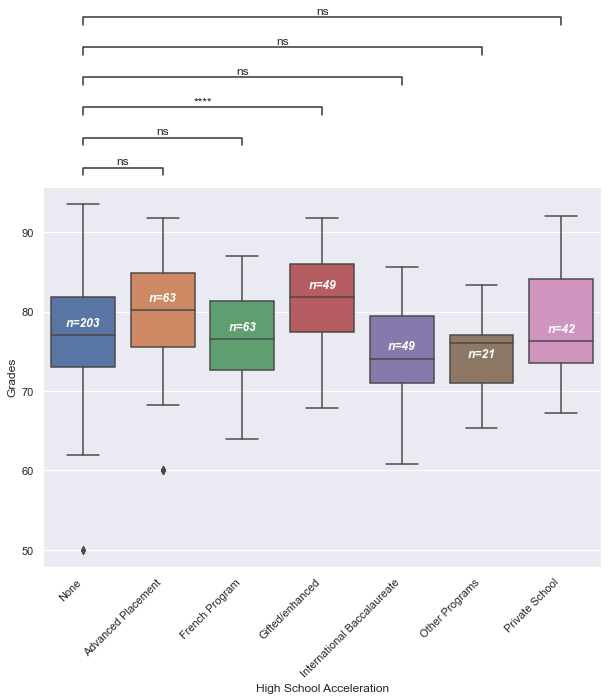

In [75]:
fig,ax=plt.subplots(figsize=(10,7))
p = sns.boxplot(x="High School Acceleration",y="Grades",order=labels_sorted,data=uni_grades)
# p = sns.swarmplot(x="High School Acceleration",y="Grades",order=labels_sorted,data=uni_grades,color=".2")
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')

medians = uni_grades.groupby(['High School Acceleration'])['Grades'].median()
medians_sorted = {}
for label in labels_sorted:
    medians_sorted[label] = medians[label]
medians = pd.Series(medians_sorted)

v_offset = uni_grades['Grades'].median() * 0.015
ns = [uni_grades['High School Acceleration'].tolist().count(label) for label in labels_sorted]
for i,xtick in enumerate(p.get_xticks()):
    if i == 5:
        p.text(xtick,medians[xtick] - 1.5*v_offset, 'n='+str(ns[i]),
              horizontalalignment='center',color='w',style='italic',weight='semibold')
    else:
        p.text(xtick,medians[xtick] + v_offset, 'n='+str(ns[i]),
              horizontalalignment='center',color='w',style='italic',weight='semibold')

x = "High School Acceleration"
y = "Grades"
order = labels_sorted
add_stat_annotation(ax, data=uni_grades, x=x, y=y, order=order,
                    box_pairs=[("None", "Advanced Placement"),
                               ("None", "French Program"),
                               ("None", "Gifted/enhanced"),
                               ("None", "International Baccalaureate"),
                               ("None", "Other Programs"),
                               ("None", "Private School")],
                    test='t-test_welch', text_format='star', loc='outside', verbose=2)
        
plt.show()

In [72]:
from statannot import add_stat_annotation

In [50]:
from scipy.stats import ttest_ind

In [56]:
uni_grades.loc[uni_grades['High School Acceleration'] == 'None']['Grades'].dropna().tolist()

[62.0,
 69.0,
 72.46,
 73.46,
 73.36,
 83.3,
 78.0,
 84.09100000000001,
 91.91,
 82.8,
 84.5,
 68.46,
 84.0,
 86.0,
 80.0,
 76.0,
 82.46,
 74.0,
 70.0,
 79.7,
 78.8,
 71.0,
 76.0,
 80.0,
 87.0,
 78.0,
 78.54,
 74.0,
 71.0,
 67.0,
 74.42,
 75.67,
 74.25,
 83.73,
 85.0,
 87.5,
 93.58,
 77.9,
 87.2,
 66.0,
 83.0,
 78.0,
 75.0,
 78.0,
 85.5,
 77.0,
 72.0,
 87.1,
 85.3,
 73.0,
 75.0,
 78.0,
 86.0,
 80.0,
 81.25,
 79.0,
 66.0,
 67.0,
 72.8,
 65.0,
 69.6,
 87.4,
 78.0,
 83.6,
 92.8,
 73.2,
 83.0,
 65.4,
 69.0,
 81.0,
 65.0,
 72.0,
 76.4,
 74.0,
 67.0,
 84.6,
 75.6,
 74.0,
 66.0,
 76.0,
 84.0,
 72.0,
 80.4,
 76.0,
 66.0,
 73.0,
 76.27,
 74.0,
 72.0,
 50.0,
 76.0,
 90.27,
 81.4,
 81.9,
 71.0,
 67.0,
 80.0,
 80.0,
 75.0,
 75.0,
 76.0,
 77.0,
 82.5,
 72.0,
 73.0,
 76.0,
 80.0,
 83.0,
 81.0,
 72.0,
 69.0,
 77.0,
 73.0,
 76.6,
 80.2,
 80.0,
 83.8,
 71.2,
 86.6,
 71.0,
 75.0,
 83.0,
 70.0,
 70.0,
 79.8,
 68.0,
 75.0,
 82.6,
 76.2,
 73.0,
 65.0,
 74.0,
 79.0,
 77.0,
 83.8,
 81.0,
 66.0,
 73.0,
 76.27

In [62]:
data1 = uni_grades.loc[uni_grades['High School Acceleration'] == 'None']['Grades'].dropna().tolist()
data2 = uni_grades.loc[uni_grades['High School Acceleration'] == 'Advanced Placement']['Grades'].dropna().tolist()
stat, p = ttest_ind(data1, data2, equal_var = False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-1.488, p=0.141
Probably the same distribution


In [67]:
data2 = uni_grades.loc[uni_grades['High School Acceleration'] == 'Gifted/enhanced']['Grades'].dropna().tolist()
stat, p = ttest_ind(data1, data2, equal_var = False)
print('stat=%.3f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-4.690, p=0.00001
Probably different distributions


In [68]:
data2 = uni_grades.loc[uni_grades['High School Acceleration'] == 'French Program']['Grades'].dropna().tolist()
stat, p = ttest_ind(data1, data2, equal_var = False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.957, p=0.341
Probably the same distribution


In [ ]:
data2 = uni_grades.loc[uni_grades['High School Acceleration'] == 'French Program']['Grades'].dropna().tolist()
stat, p = ttest_ind(data1, data2, equal_var = False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

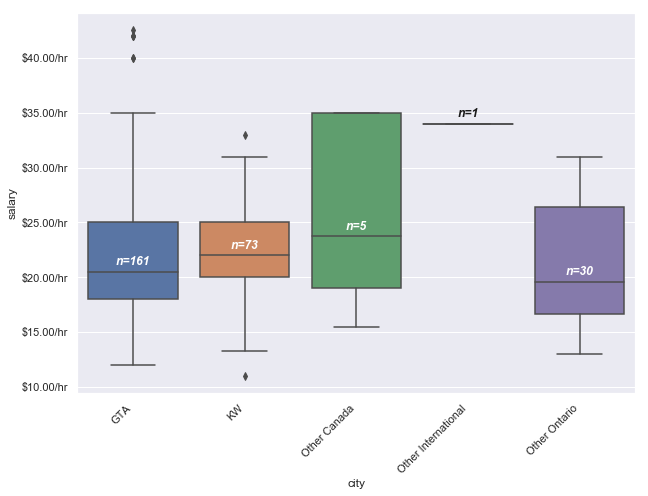

In [145]:
fig,ax=plt.subplots(figsize=(10,7))
p = sns.boxplot(x="city",y="salary",order=city_sorted,data=cad)
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')
medians = cad.groupby(['city'])['salary'].median()
medians_sorted = {}
for city in city_sorted:
    medians_sorted[city] = medians[city]
medians = pd.Series(medians_sorted)
v_offset = cad['salary'].median() * 0.03
ns = [cad['city'].tolist().count(city) for city in city_sorted]
for i,xtick in enumerate(p.get_xticks()):
    if i == 3:
        p.text(xtick,medians[xtick] + v_offset, 'n='+str(ns[i]),
              horizontalalignment='center',color='k',style='italic',weight='semibold')
    else:
        p.text(xtick,medians[xtick] + v_offset, 'n='+str(ns[i]),
              horizontalalignment='center',color='w',style='italic',weight='semibold')
fig.canvas.draw()
ylab = ['$'+str(lab.get_text())+'.00/hr' for lab in p.get_yticklabels()]
p.set_yticklabels(ylab)
plt.show()

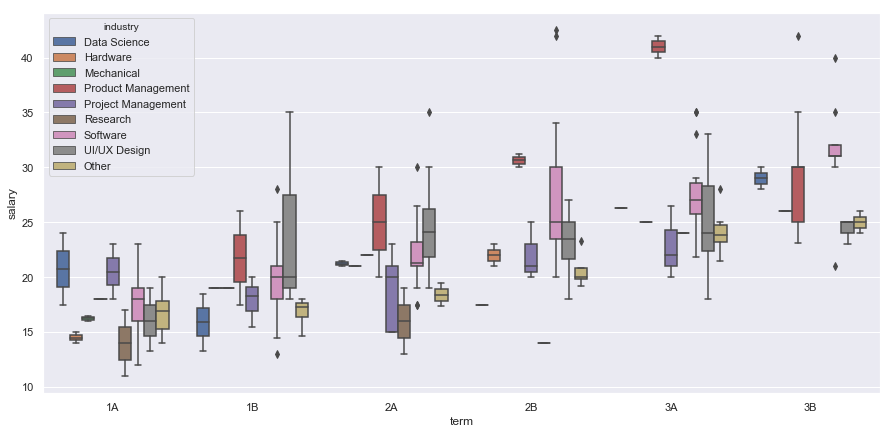

In [72]:
plt.subplots(figsize=(15,7))
sns.boxplot(x="term",y="salary",hue="industry",hue_order=industry_sorted,data=cad)
plt.show()